In [1]:
# Project Details

# Introduction
    # ou will conduct your own data analysis and create a file to share that documents your findings. 

# 1. Step One - Choose Your Data Set
    # Titanic Data
    # Baseball Data

# 2. Step Two - Get Organized (reating a single folder)
    # 1. The_Report: The report communicating your findings
    # 2. Python_code: Any Python code you wrote as part of your analysis
    # 3. The_Dataset: The data set you used (which you will not need to submit)

# 3. Step Three - Analyze Your Data
    # Titanic Data
        # What factors made people more likely to survive?
    # Baseball Data
        # What is the relationship between different performance metrics? Do any have a strong negative or positive relationship?
        # What are the characteristics of baseball players with the highest salaries?

# 4. Step Four - Share Your Findings
    # create a report that shares the findings you found most interesting

# 5. Step Five - Review
    # "https://docs.google.com/document/d/1YzdSG-rYJuNSprUppkpeno_lobQ7izUxYj_sCUrY3Rg/pub"

# Project: The Factors Made People More Likely to Survive
**By:** Saleem Saif

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#Methodology">2. Study Methodology</a></li>
<li><a href="#Findings">3. Findings and Discussion</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction
This electronic document presents a statistical analysis of a sample of passengers of the Titanic. The data was acquired from the Kaggle website and it corresponds to a sample of 891 passengers of the 2,222 passengers and crew. The purpose of the analysis is to apply the data analysis process to answer questions about the data. In particular it is of special interest to investigate which variable could serve explain why some passengers were able to survive and others not.


    
### 1.1 Study Objective (1. Questions)
Section 1: presents a set of questions relevant to the researcher. **What factors made people more likely to survive?**
<br>The following questions regarding the Titanic Dataset were formulated considering the data analysis process. This means that such questions were formulated considering the information available. 
<br>The focus of the questions is to try to explain the factors to increase the chances to survive:
- 1. Does sex played a role in increasing the passengers chance to survive?
- 2. Does age improved the chance to survive?
- 3. Does income and chance to survive are related?
- 4. Does having family members inceased the chance to survive? 


**Source:**

**Note:** 
Based on the stages of the training course, we will proceed with the same steps of the training course to explain this study as a section: (1. Questions) (2. Data Wrangling) (3. Data Exploration) (4. Analysis) (5. Conclusions)

<a id='Methodology'></a>
## 2. Study Methodology
### 2.1. Data collection
Titanic Data: Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website.
    


In [5]:
# Importing dependencies
# Imported libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%pylab inline


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


The titanic dataset is imported into a DataFrame using Pandas library. Because the file is a csv file, the read_csv() function was used to parse the data.

In [7]:
# Importing Data
# Reading data with Pandas into a DataFrame

df = pd.read_csv('titanic_data.csv')

The data was collected and arranged in a table containing 12 columns, which are:
<br>With the purpose to know if the titanic data was imported correctly, the columns' name and data types were printed. The dataset contains variables such passenger survived status, sex, age, number of family memebers, ticket fare, cabin and port of embarkment.

In [9]:
df.info()
# df.columns
# df.dtypes
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data was collected and arranged in a table containing 891 records/rows.

In [11]:
print(f"The data set has {df.shape[0]} records")

The data set has 891 records


In [12]:
# df.head()
# df.tail()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Also the first and last five rows of the DataFrame were printed to analyze the information stored in the dataset.

In [14]:
# df.info() توضيح وملخص البيانات السابقة التي تم تجميعها قبل المعالجة 

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.2. Data Wrangling (2. Data Wrangling)
Section 2: presents the data wrangling process, that covers the data aquistion and data cleaning process.

Data problems are usually numerous and are arranged according to their importance in their impact on data analysis, as follows:
<br>"Missing Values, Duplicate Data,	Inconsistent Formatting, Outliers, Data Entry Errors, Imbalanced Data, Encoding Issues, Irrelevant Data, Skewed Data Distribution, Data Type Mismatch".
<br>After printing the first and last five rows of the titanic dataset. The Titanic dataset provided contains several potential data quality issues across its columns. Here's a breakdown of the key problems for each column:
- 1. **PassengerId**: No Issues. 
- 2. **Survived**: No Issues.
- 3. **Pclass**: No Issues.
- 4. **Name**: Potential Issues (Inconsistent formatting + Special characters ...).
- 5. **Sex**: No Issues.
- 6. **Age**: Potential Issues (Missing Values + Fractional Ages + Outliers).
- 7. **SibSp** (Siblings/Spouses): No Issues.
- 8. **Parch** (Parents/Children): No Issues.
- 9. **Ticket**: Potential Issues (Inconsistent Format + Duplicate Ticket Numbers).
- 10. **Fare** (Income): No Issues.
- 11. **Cabin** (Block): Potential Issues (Missing Values + Multiple Cabins + Formatting).
- 12. **Embarked**: Potential Issues (Missing Values)


The data that must be processed is the data that will be studied and is divided into Independent variables and dependent variables.
- **Independent variable**: 
  - Survived
- **Dependent variable**: 
  - Pclass
  - Sex
  - Age
  - SibSp (Siblings/Spouses)
  - Parch (Parents/Children)
  - Fare (Income)
  - Cabin (Block)
  - Embarked

Many issues have been identified in the columns as:

In [19]:
def process_columns(df, top_n=10):

    """
    دالة لمعالجة كافة الأعمدة بتطبيق نفس العمليات دون تعديل الجدول الأصلي:
    - حساب عدد العينات والقيم الفريدة
    - استبدال القيم غير الشائعة بـ 'Other'
    - فحص نوع البيانات والقيم المفقودة
    """
    # إنشاء نسخة من الجدول لتجنب تعديل الأصل
    df_processed = df.copy()

    for col in df_processed.columns:
        print(f"\n-------------\nProcessing column: '{col}'")
        original_series = df_processed[col]
        
        # Basic stats
        print(f"Number of samples input: {original_series.count()}")
        print(f"Number of unique values: {original_series.nunique()}")
        
        # Handle top values by frequency (ليس حسب الترتيب)
        value_counts = original_series.value_counts()
        top_values = value_counts.head(top_n).index.tolist()  # أهم القيم حسب التكرار
        
        # استبدال القيم غير الشائعة بـ 'Other' في النسخة فقط
        df_processed[col] = original_series.where(
            original_series.isin(top_values), 
            'Other'
        )
        
        # عرض النتائج من النسخة (بعد التعديل)
        modified_series = df_processed[col]
        print(f"\nTop {top_n} values (+ 'Other' if any):")
        print(modified_series.value_counts(dropna=True).head(top_n + 1))
        
        # Data type and missing values
        print(f"\nData type: {modified_series.dtype}")
        print(f"Missing values: {modified_series.isna().sum()}")
        
    return df_processed  # إرجاع النسخة المعدلة

# مثال للاستخدام (يتم تطبيقه على جميع الأعمدة تلقائيًا):
df_processed = process_columns(df, top_n=10)


-------------
Processing column: 'PassengerId'
Number of samples input: 891
Number of unique values: 891

Top 10 values (+ 'Other' if any):
PassengerId
Other    881
1          1
588        1
589        1
590        1
591        1
592        1
593        1
594        1
595        1
599        1
Name: count, dtype: int64

Data type: object
Missing values: 0

-------------
Processing column: 'Survived'
Number of samples input: 891
Number of unique values: 2

Top 10 values (+ 'Other' if any):
Survived
0    549
1    342
Name: count, dtype: int64

Data type: int64
Missing values: 0

-------------
Processing column: 'Pclass'
Number of samples input: 891
Number of unique values: 3

Top 10 values (+ 'Other' if any):
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Data type: int64
Missing values: 0

-------------
Processing column: 'Name'
Number of samples input: 891
Number of unique values: 891

Top 10 values (+ 'Other' if any):
Name
Other                                          

### 2.2.1. **استراض البييانات ومعرفة الخلل**:
After printing the previous code, it was found that there were no problems with some variables, but there were problems with others, as follows:

**Survived**
There is no data problem, meaning it does not need any processing (Data Wrangling).
<br>In the 891 sample of passengers only:
- 342 surived=1 (38%) and
- 549 died=0 (62%).

**Pclass**
There is no data problem.
<br>In the 891 sample of passengers only:
- 491 Third Class=3,
- 216 First Class=1, and
- 184 Second Class=2.

**Sex**
There is no data problem.
<br>In the 891 sample of passengers only:
- 577 male=1,
- 314 female=2.

**Age**
There is data problem, meaning it does need processing (Data Wrangling): Missing Values, Fractional Ages, and Outliers.
<br>In the 891 sample of passengers only:
- 177 Missing Values (NaN), and
- 714 Fractional Ages, and Outliers.

**SibSp** (Siblings/Spouses)
There is no data problem.
<br>In the 891 sample of passengers only:
- 608 There is no Sibling/Spouse=0,
- 209 There is 1 Sibling/Spouse=1, 
- 28  There are 2 Siblings/Spouses=2, 
- 18  There are 4 Siblings/Spouses=4, 
- 7   There are 8 Siblings/Spouses=8, and
- 5   There are 5 Siblings/Spouses=5, 

**Parch** (Parents/Children)
There is no data problem.
<br>In the 891 sample of passengers only:
- 678 There is no Parents/Children=0,
- 118 There is 1 Parents/Children=1, 
- 80  There are 2 Parents/Children=2, 
- 5   There are 4 Parents/Children=5,
- 5   There are 4 Parents/Children=3, 
- 4   There are 8 Parents/Children=4, and
- 1   There are 5 Parents/Children=6, 

**Fare** (Income)
There is no data problem.
<br>In the 891 sample of passengers only:
- 891 Range from 000 to 000.

**Cabin** (Block)
There is data problem: Missing Values, Multiple Cabins, and Formatting.
<br>In the 891 sample of passengers only:
- 687 Missing Values (NaN), and
- 213 Multiple Cabins and Formatting.

**Embarked**
There is data problem: Missing Values.
<br>In the 891 sample of passengers only:
- 2 Missing Values (NaN), and
- 644 0000 = S,
- 168 0000 = C, and
- 77  0000 = Q,

### 2.2.2. **معالجة**:
Data review is about identifying data problems with each variable. Data will be processed on the following variables:

**Pclass**
 - Age groups were built using the information in the age column.

**Age**
 - Age groups were built using the information in the age column.

**Fare**
 - Age groups were built using the information in the 000 column.

**Cabin**
 - The cabin block was extracted from the cabin column.


In [23]:
# Function to create categorical travelling sex
def getStringSex(Sex):
    if Sex == 'male':
        return 1
    elif Sex == 'female':
        return 2

    else:
        return 99

In [24]:
# Function to create categorical travelling class
def getStringClass(pclass):
    if pclass == 1:
        return 'First'
    elif pclass == 2:
        return 'Second'
    elif pclass == 3:
        return 'Third'
    else:
        return 99

In [25]:
# Function for classifying ages (Infant, Children, Teenagers,Adult, Elderly/Senior and Unclassified)
def getAgeGroup(age):
    if age < 1:
        return 'Infant'
    elif age >= 1 and age <13:
        return 'Children' 
    elif age >= 13 and age <20:
        return 'Teenagers'         
    elif age >= 20 and age <60:
        return 'Adult'
    elif age >= 60:
        return 'Elderly/Senior'
    else:
        return 99

In [26]:
# Function to get the cabin block letter
def getCabinBlockLetter(cabinRoomNumber):
    for cabinLetter in cabinRoomNumber:
        firstLetter = cabinLetter[0]
        return firstLetter

In [27]:
# Function to create categorical travelling sex
def getStringBlock(Block):
    if Block == 'A':
        return 1
    if Block == 'B':
        return 2
    if Block == 'C':
        return 3
    if Block == 'D':
        return 4
    if Block == 'E':
        return 5
    if Block == 'F':
        return 6
    if Block == 'G':
        return 7
    if Block == 'T':
        return 8        
    else:
        return 99

In [28]:
# Function for classifying ages (Infant, Children, Teenagers,Adult, Elderly/Senior and Unclassified)
def getStringEmbarked(Embarked):
    if Embarked == 'C':
        return 1
    if Embarked == 'Q':
        return 2
    if Embarked == 'S':
        return 3
        
    else:
        return 99

The columns containing the cleaned data using the functions above were added to the data frame. Also, to verify that the new columns were correctly added to the DataFrame, the first five rows were printed again.

In [30]:
# Adding extra columns:
df['CategoryPClass'] = df.Pclass.apply(getStringClass)
df['SexNO'] = df.Sex.apply(getStringSex)
df['AgeGroup'] = df.Age.apply(getAgeGroup)
df['FamilySize'] = df['SibSp'] + df['Parch']
df['Block'] = df.Cabin.astype('str').apply(getCabinBlockLetter)
df['BlockNO'] = df.Block.apply(getStringBlock)
df['EmbarkedNO'] = df.Embarked.apply(getStringEmbarked)

In [31]:
# A view of the extended version of the DataFrame
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoryPClass,SexNO,AgeGroup,FamilySize,Block,BlockNO,EmbarkedNO
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third,1,Adult,1,n,99,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First,2,Adult,1,C,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third,2,Adult,0,n,99,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First,2,Adult,1,C,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third,1,Adult,0,n,99,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Second,1,Adult,0,n,99,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,First,2,Teenagers,0,B,2,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Third,2,99,3,n,99,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,First,1,Adult,0,C,3,1


<a id='Findings'></a>
## 3. Findings and Discussion (3. Data Exploration + 4. Analysis)
Section 3: presents a detailed exploratory analysis of the main variables in the data set.
Section 4: analyzes the questions formulated in section 1 applying descriptive and inferential statistics.

The following functions were created to draw custom graphs, allowing to reduce the lines of code written. Some of the customizations added are title and labels, among many others.

In [34]:
# Custom Pie Chart.
def plot_flexible_pie(df, column, title='التوزيع الدائري', figsize=(10,8)):
    """
    دالة لرسم مخطط دائري لعمود يحتوي على 2-5 فئات
    """
    # حساب التكرارات
    counts = df[column].value_counts()
    
    # إنشاء قائمة ألوان مخصصة
    colors = plt.cm.Pastel1.colors[:len(counts)]  # ألوان من سكلة Pastel
    
    # إعداد فصل الشرائح (explode)
    explode = [0.05] * len(counts)  # فصل بسيط لكل الشرائح
    
    # إنشاء التسميات الذكية
    labels = [f'{label}\n({count} - {percent:.1f}%)' 
             for label, count, percent in zip(
                 counts.index,
                 counts.values,
                 100 * counts / counts.sum()
             )]
    
    # إنشاء الرسمة
    plt.figure(figsize=figsize)
    wedges, texts, autotexts = plt.pie(
        counts,
        labels=labels,
        colors=colors,
        explode=explode,
        startangle=90,
        shadow=True,
        textprops={'fontsize': 12, 'fontweight': 'bold'},
        autopct=''
    )
    
    # إضافة عنوان
    plt.title(title, fontsize=16, pad=20, fontweight='bold')
    
    # إضافة وسيلة إيضاح (legend) مع النسب
    plt.legend(
        wedges,
        [f'{l} ({p:.1f}%)' for l, p in zip(counts.index, 100 * counts / counts.sum())],
        title="Categories",
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )
    
    plt.axis('equal')
    plt.show()


In [35]:
# Custom histogram.
from scipy import stats

def plot_distribution(df, column, font_settings=None):
    """
    دالة لرسم توزيع البيانات مع تحكم مركزي في الخطوط
    
    Parameters:
    df (DataFrame): الجدول المدخل
    column (str): اسم العمود المراد تحليله
    font_settings (dict): قاموس إعدادات الخطوط العامة
    """
    
    # إعدادات الخطوط الافتراضية
    default_font = {
        'font.family': 'Arial',
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 16,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    }
    
    # دمج الإعدادات المخصصة مع الافتراضية
    if font_settings:
        default_font.update(font_settings)
    
    # تطبيق إعدادات الخطوط
    plt.rcParams.update(default_font)
    
    # الباقي من الكود كما هو...
    plt.figure(figsize=(18, 9))
    data = df[column].dropna()
    colors = sns.color_palette("pastel")

    if pd.api.types.is_numeric_dtype(data):
        plt.subplot(1, 2, 1)
        sns.histplot(data, kde=True, color=colors[0])
        plt.title(f'Distribution {column}\n(Histogram + KDE)')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=data, color=colors[1])
        plt.title(f'Box Plot for {column}')

        stats_text = (
            f"Statistics:\n"
            f"Count: {data.count()}\n"                 # عدد القيم غير المفقودة
            f"Mean: {data.mean():.2f}\n"               # المتوسط الحسابي
            f"Median: {data.median():.2f}\n"           # الوسيط
            f"Std Dev: {data.std():.2f}\n"             # الانحراف المعياري
            f"Variance: {data.var():.2f}\n"            # التباين
            f"Min: {data.min():.2f}\n"                 # القيمة الدنيا
            f"25%: {data.quantile(0.25):.2f}\n"        # الربيع الأول (Q1)
            f"50%: {data.quantile(0.50):.2f}\n"        # الوسيط (Q2)
            f"75%: {data.quantile(0.75):.2f}\n"        # الربيع الثالث (Q3)
            f"Max: {data.max():.2f}\n"                 # القيمة القصوى
            f"Range: {data.max() - data.min():.2f}\n"  # المدى
            f"IQR: {data.quantile(0.75) - data.quantile(0.25):.2f}\n"  # المدى الربيعي
            f"Skewness: {data.skew():.2f}\n"           # معامل الالتواء
            f"Kurtosis: {data.kurtosis():.2f}\n"       # معامل التفرطح
            f"Sum: {data.sum():.2f}\n"                 # المجموع الكلي
            f"Mode: {data.mode().values[0]}\n"         # المنوال (القيمة الأكثر تكرارًا)
            f"Coefficient of Variation: {(data.std()/data.mean())*100:.2f}%"  # معامل الاختلاف
)
        plt.gcf().text(1, 0.5, stats_text, ha='left', va='bottom', fontsize=18)

    else:
        plt.subplot(1, 2, 1)
        counts = data.value_counts()
        bars = sns.barplot(x=counts.index, y=counts.values, palette=colors)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)

        total = len(data)
        for p in bars.patches:
            percentage = f'{100 * p.get_height()/total:.1f}%'
            x = p.get_x() + p.get_width()/2
            y = p.get_height()
            plt.annotate(percentage, (x, y), ha='center', va='bottom')

        plt.subplot(1, 2, 2)
        plt.pie(counts, 
                labels=counts.index, 
                autopct='%1.1f%%',
                startangle=90,
                colors=colors)
        plt.title(f'Percentage Distribution of {column}')

    plt.tight_layout()
    plt.show()

In [36]:
# Custom histogram.
def plotHistogram(dataSeries, binNumber, mainTitle, xlabel):
    plt.hist(dataSeries, binNumber)
    plt.title(mainTitle)
    plt.ylabel('Count')
    plt.xlabel(xlabel)
    plt.show()

In [37]:
# Custom boxplot
def boxPlot(dataSeries, mainTitle):
    sns.boxplot(dataSeries)
    plt.title(mainTitle)
    plt.show()

In [38]:
# Custom counting bar plot
def countPlot(series,mainTitle,xlabel):
    sns.countplot(x=series, data=titanicData)
    plt.title(mainTitle)
    plt.ylabel('Count')
    plt.xlabel(xlabel)
    plt.show()

In [39]:
# Custom stacked bar plot
def plotStackedBarPlot(xvar,yvarBottom,yvarTop,mainTitle,xlabel,ylabel):
    ind = np.arange(len(xvar))
    xticks(ind + 0.4,xvar)
    plt.bar(ind,yvarBottom, color= '#313F68', label='suvivors')
    plt.bar(ind,yvarTop,color='#B8B8C8',bottom=yvarBottom, label = 'dead')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(mainTitle)
    plt.legend(frameon=True)
    plt.show()

### 3.1. استكشاف وعرض البيانات (3. Data Exploration)
This section presents a descriptive analysis of the main variables in the titanic dataset. The analysis is organized by variable.

The variables analyzed were:

**Independent variable**:
 - Survived

**Dependent variable**:
 - Pclass
 - Sex
 - Age
 - SibSp (Siblings/Spouses)
 - Parch (Parents/Children)
 - Fare (Income)
 - Cabin (Block)
 - Embarked

#### 3.1.1. استكشاف وعرض البيانات 

**Survived**
<br>The following figure shows that the Titanic accident was fatal for the majority of the people on the ship, as 61.6% (549 individuals) died and survivors were approximately 38.4% (342 individuals).
<br>The numbers suggest survival was highly challenging, potentially linked to factors like gender, age, or socioeconomic class, warranting deeper analysis.

In [43]:
df.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


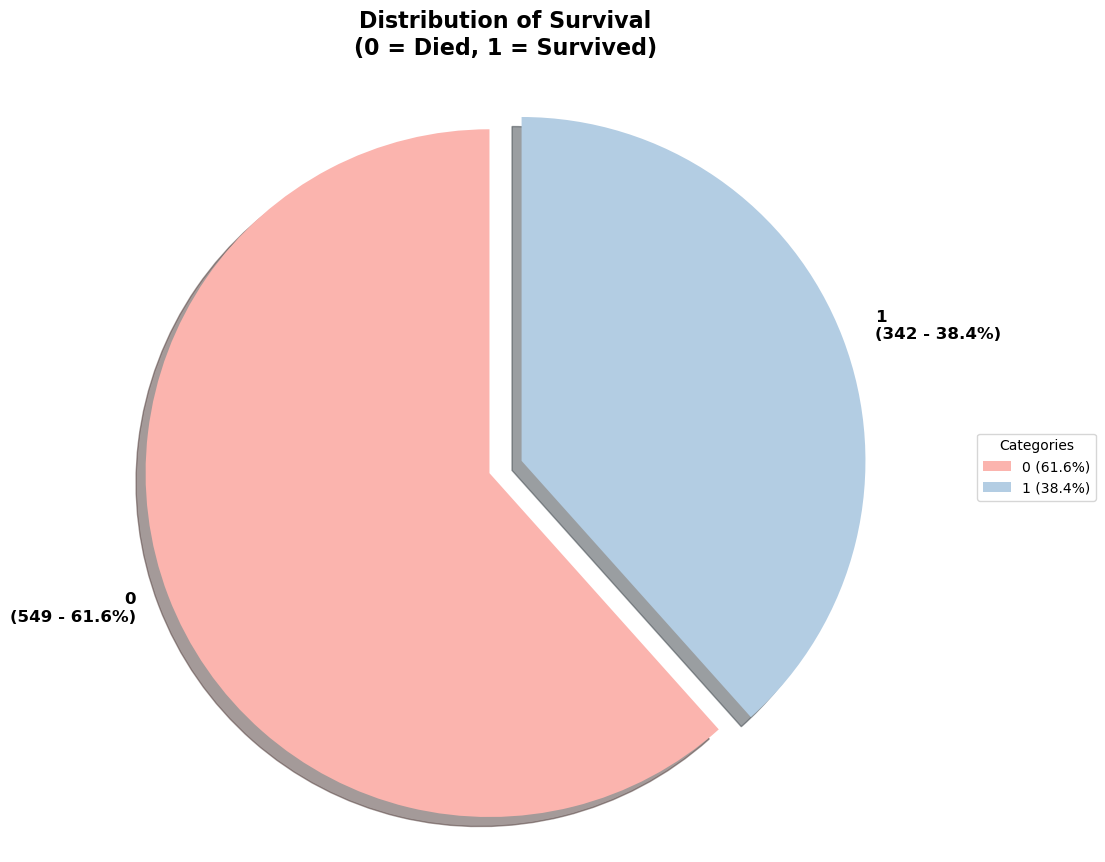

In [44]:
plot_flexible_pie(
    df, 
    column='Survived', 
    title='Distribution of Survival\n(0 = Died, 1 = Survived)', 
    figsize=(12, 10)
)

**Pclass**
<br>In the sample there were 216 passengers (24%) travelling in first class, 184 (21%) in second class and 491 (55%) in third class. The following graph shows the boxplots of the fare by passenger class (first, second and third). From the graph it can be concluded that 50% of the tickets in:
 - First class tickets were bought between 30.9 and 93.5 dollars,
 - Second class tickets were bought between 13 and 26 dollars,
 - Third class tickets were bought between 7.75 and 15.5 dollars

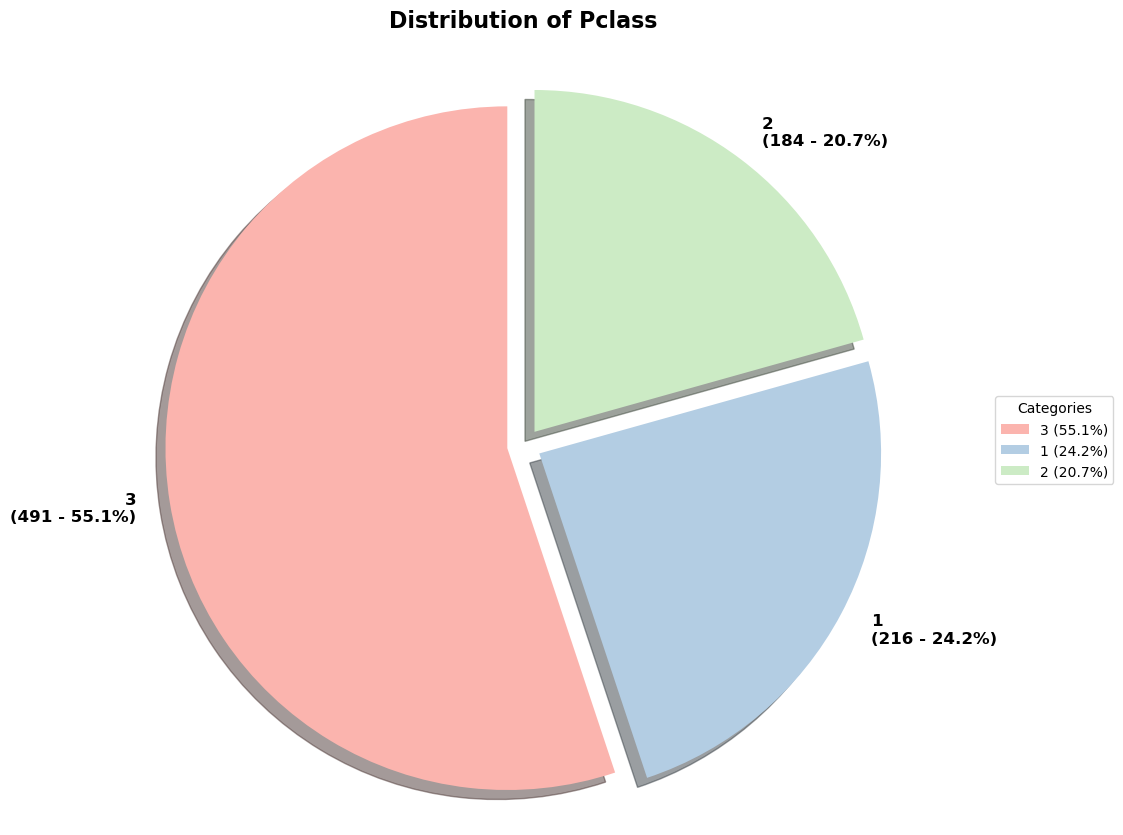

In [46]:
plot_flexible_pie(
    df, 
    column='Pclass', 
    title='Distribution of Pclass', 
    figsize=(12, 10)
)

**Sex**
<br>In the titanic passenger sample there were 453 males and 261 females.



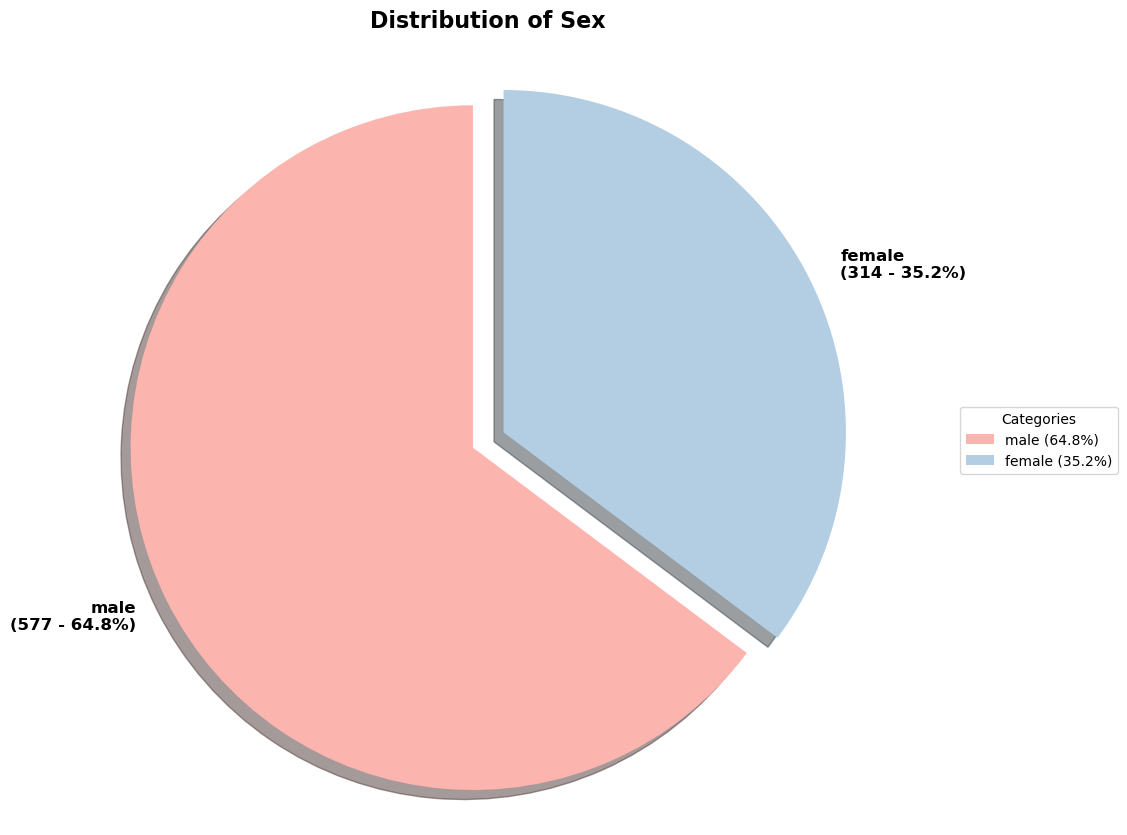

In [48]:
plot_flexible_pie(
    df, 
    column='Sex', 
    title='Distribution of Sex', 
    figsize=(12, 10)
)

**Age**
<br>In the titanic passenger sample there were 453 males and 261 females.

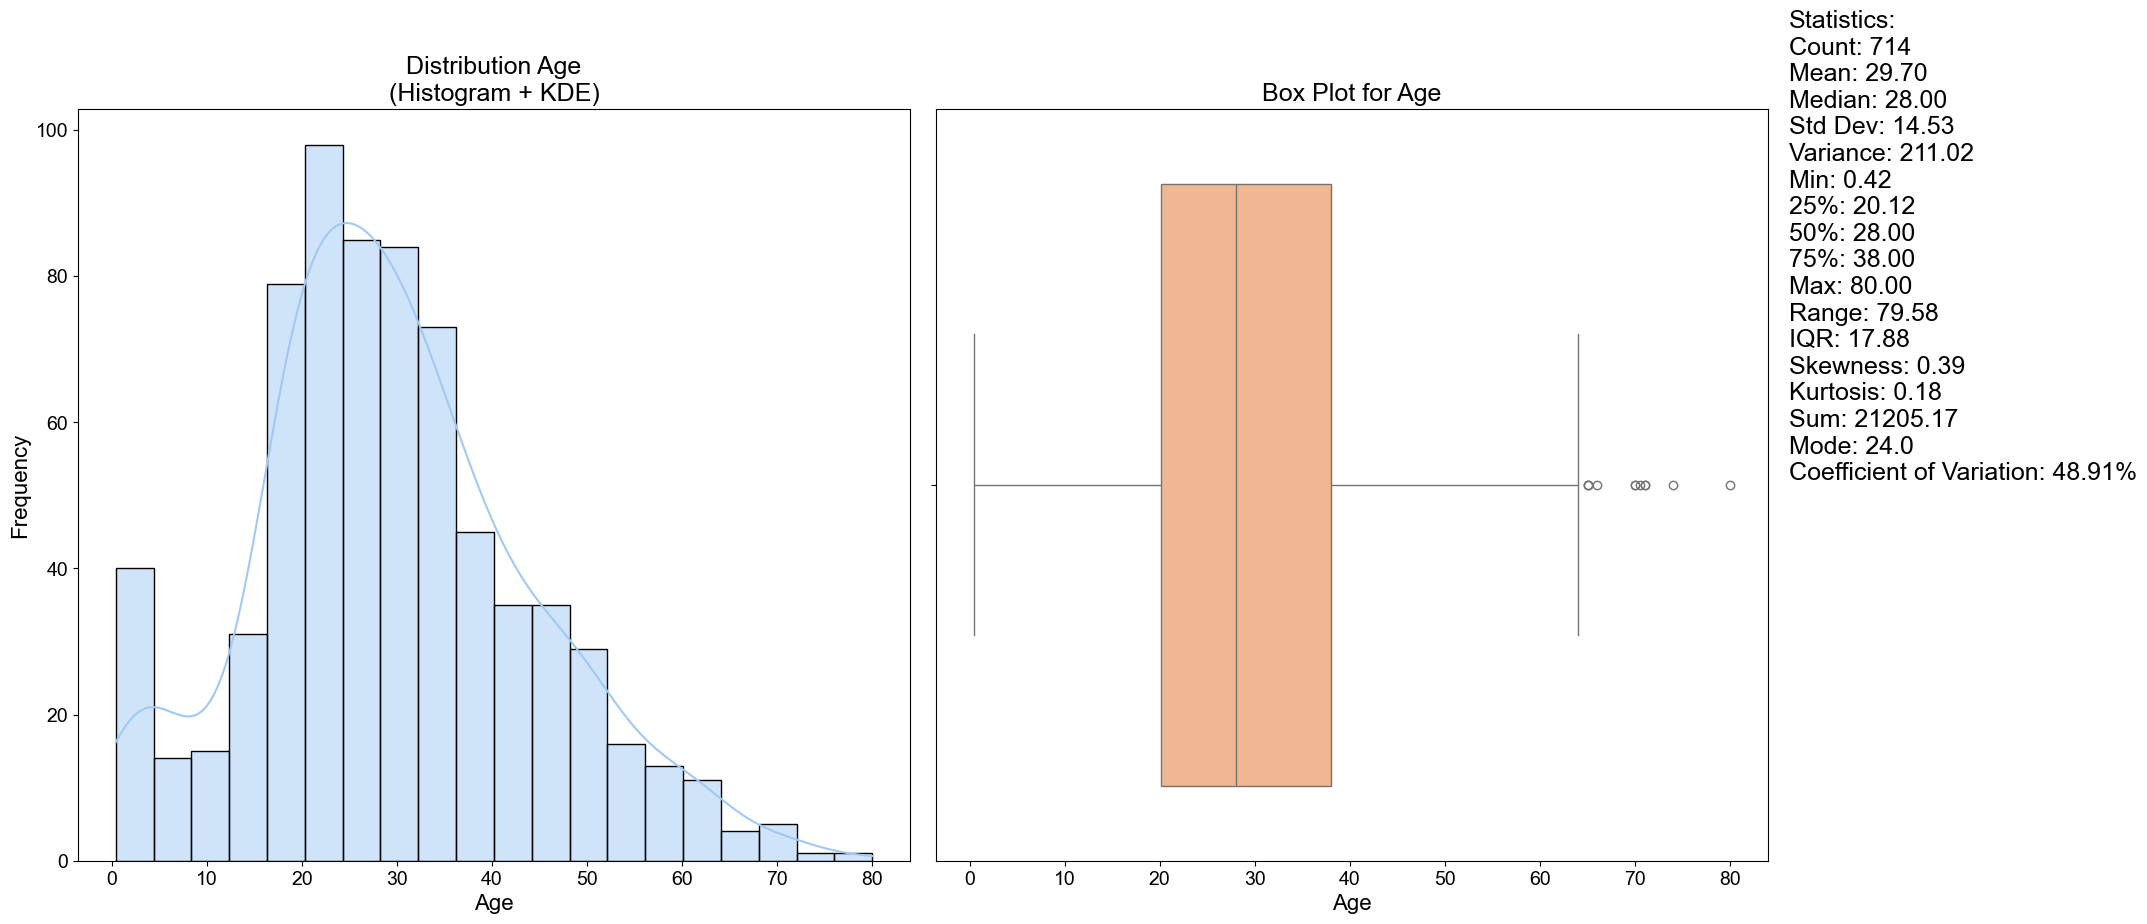

In [50]:
plot_distribution(df, 'Age')

**SibSp** (Siblings/Spouses)
<br>In the titanic passenger sample there were 453 males and 261 females.

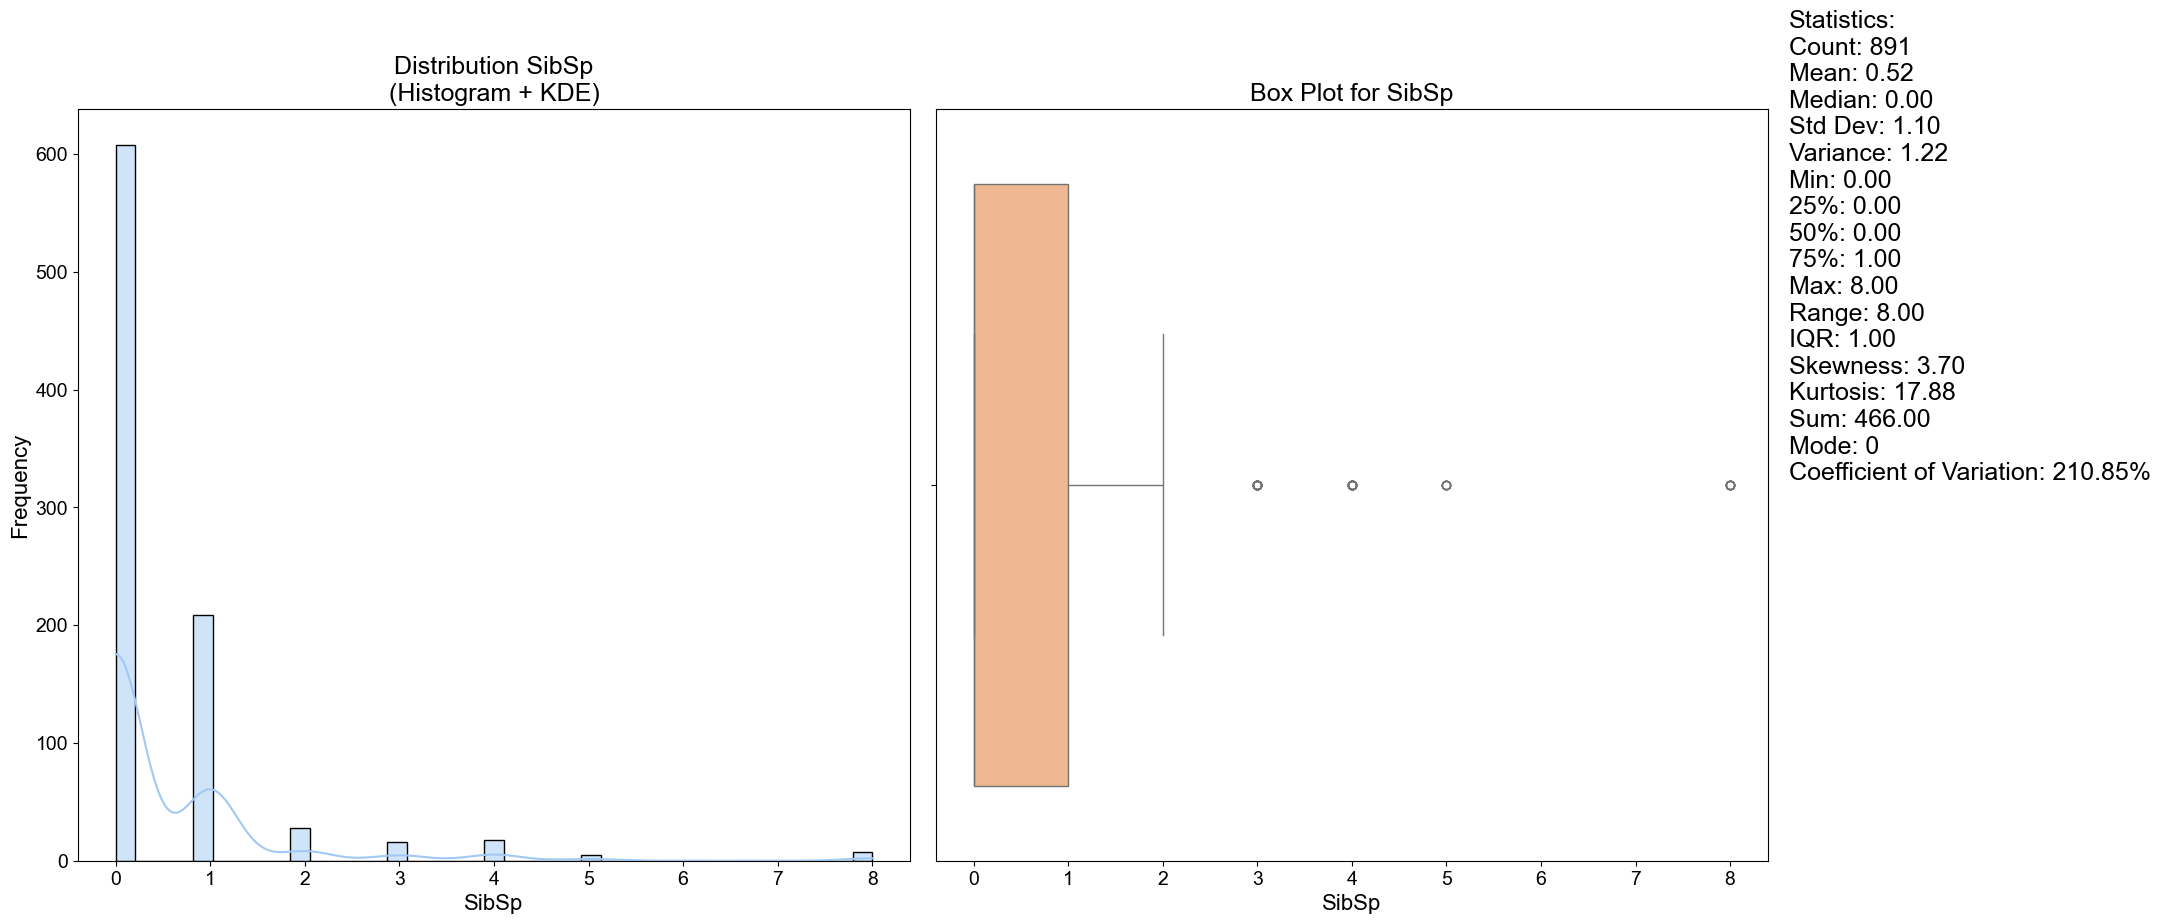

In [52]:
plot_distribution(df, 'SibSp')

**Parch** (Parents/Children)
<br>In the titanic passenger sample there were 453 males and 261 females.

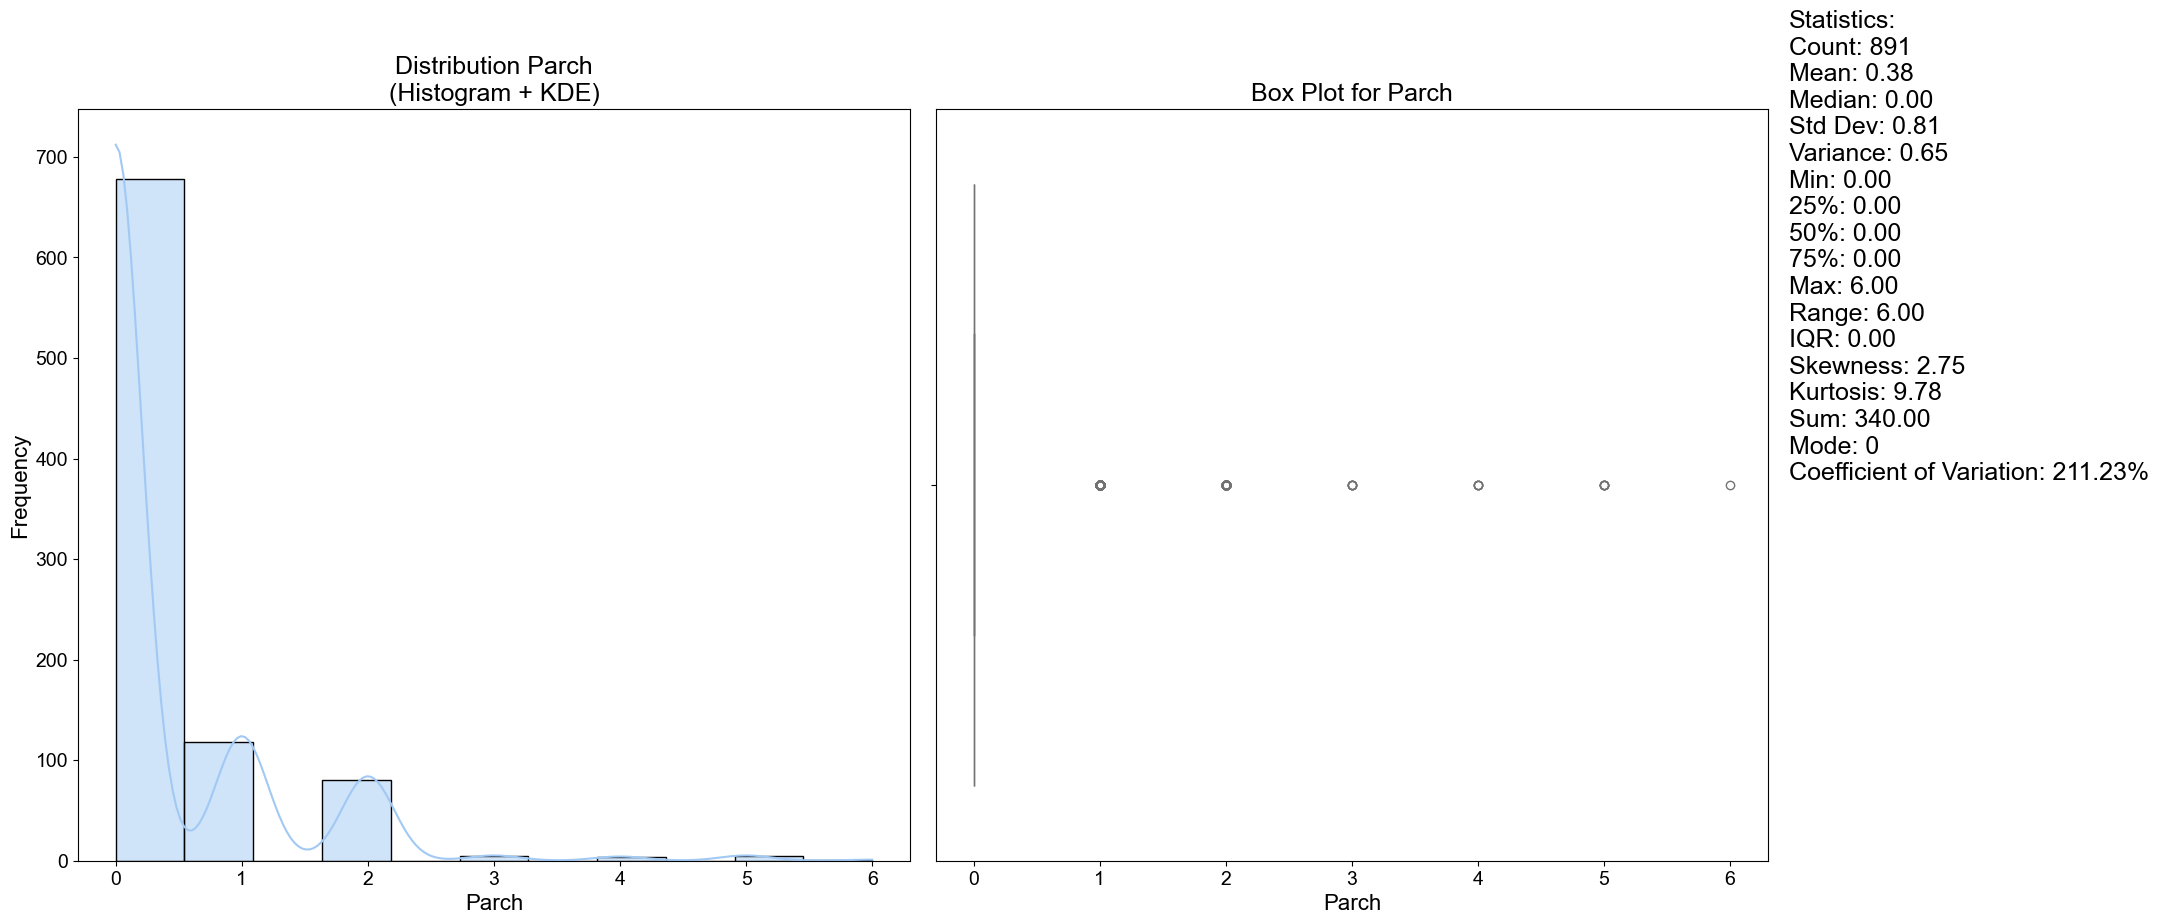

In [54]:
plot_distribution(df, 'Parch')

**Fare** (Income)
<br>In the titanic passenger sample there were 453 males and 261 females.

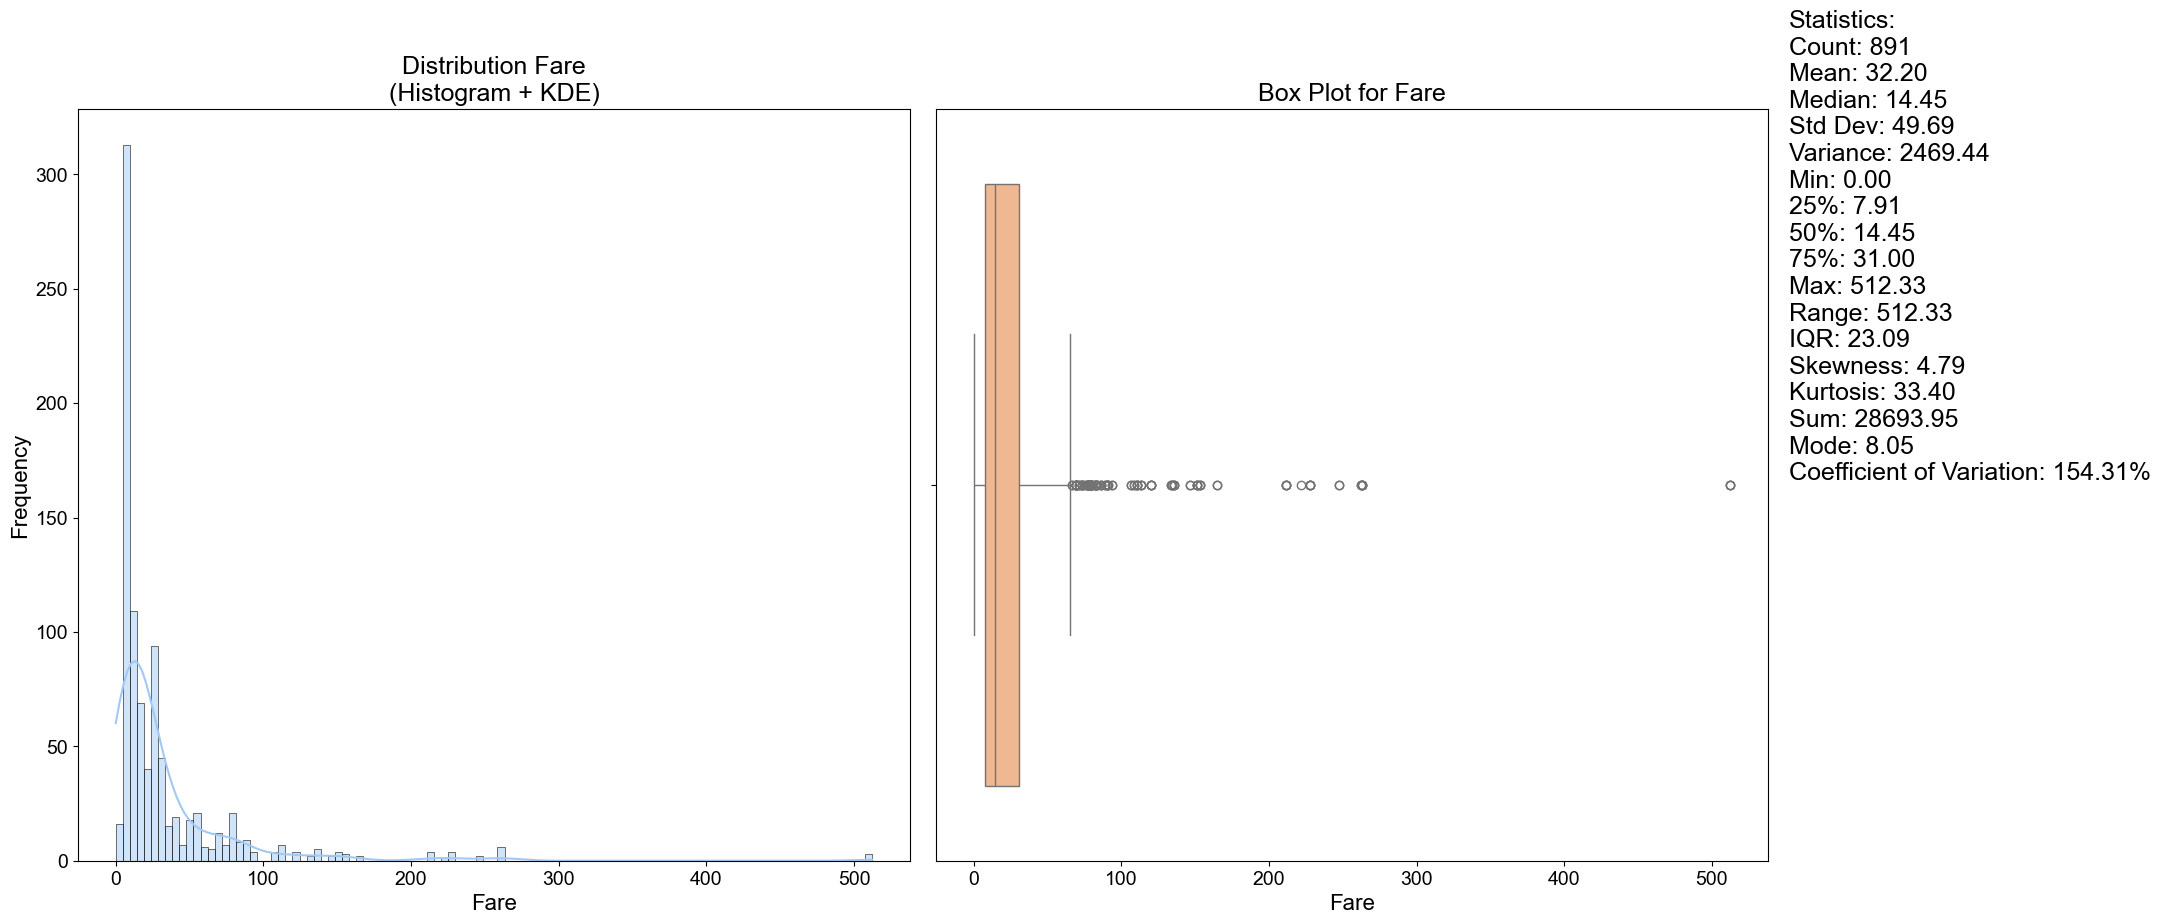

In [56]:
plot_distribution(df, 'Fare')

**Embarked** 
<br>In the titanic passenger sample there were 453 males and 261 females.

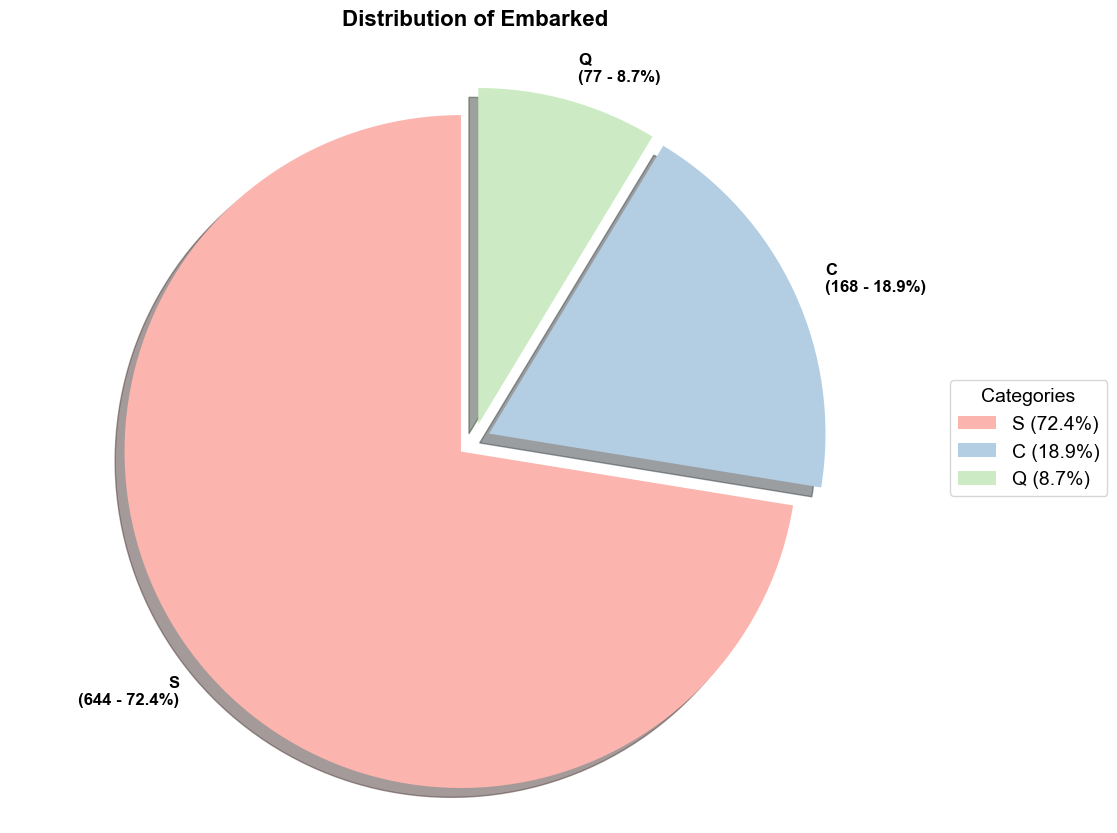

In [58]:
plot_flexible_pie(
    df, 
    column='Embarked', 
    title='Distribution of Embarked', 
    figsize=(12, 10)
)

### 3.2. قياس الارتباطات بين العمومل النجاة (4. Analysis)



**Note:** 

In [60]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoryPClass,SexNO,AgeGroup,FamilySize,Block,BlockNO,EmbarkedNO
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third,1,Adult,1,n,99,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First,2,Adult,1,C,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third,2,Adult,0,n,99,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First,2,Adult,1,C,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third,1,Adult,0,n,99,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Second,1,Adult,0,n,99,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,First,2,Teenagers,0,B,2,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Third,2,99,3,n,99,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,First,1,Adult,0,C,3,1


Correlation matrix:
            Survived    Pclass       Age     SibSp     Parch  FamilySize  \
Survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629    0.016639   
Pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443    0.065997   
Age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119   -0.301914   
SibSp      -0.035322  0.083081 -0.308247  1.000000  0.414838    0.890712   
Parch       0.081629  0.018443 -0.189119  0.414838  1.000000    0.783111   
FamilySize  0.016639  0.065997 -0.301914  0.890712  0.783111    1.000000   
Fare        0.257307 -0.549500  0.096067  0.159651  0.216225    0.217138   
SexNO       0.543351 -0.131900 -0.093254  0.114631  0.245489    0.200988   
BlockNO    -0.316710  0.728583 -0.251433  0.040624 -0.036805    0.009378   
EmbarkedNO  0.030299 -0.045163  0.068378 -0.010422 -0.015236   -0.014734   

                Fare     SexNO   BlockNO  EmbarkedNO  
Survived    0.257307  0.543351 -0.316710    0.030299  
Pclass     -0.549500 -0.131900  0

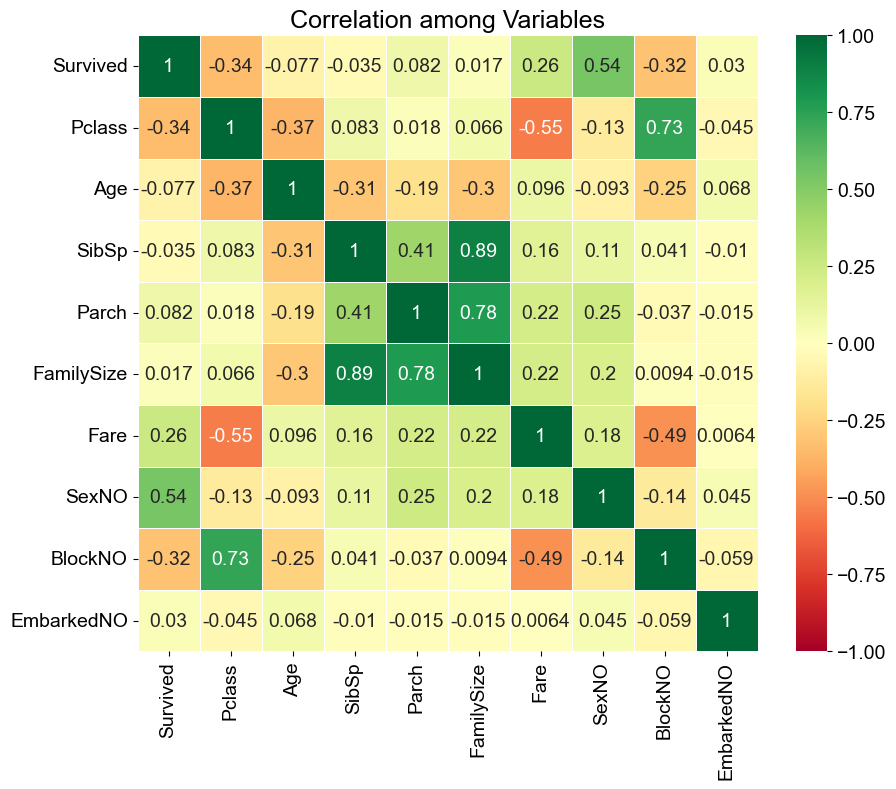

In [101]:

# 2. اختيار الأعمدة المراد تحليلها
selected_columns = ["Survived", "Pclass", "Age", "SibSp", "Parch", "FamilySize", "Fare", "SexNO", "BlockNO",'EmbarkedNO']
selected_df = df[selected_columns]

# 3. حساب مصفوفة الارتباط
correlation_matrix = selected_df.corr() # (method='pearson')  # أو 'spearman', 'kendall'

# 4. عرض مصفوفة الارتباط
print("Correlation matrix:")
print(correlation_matrix)
print("----------------------")

# 5. رسم مصفوفة الارتباط
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # عرض القيم الرقمية
    cmap='RdYlGn',  # خريطة ألوان coolwarm
    vmin=-1,  # الحد الأدنى للقيمة
    vmax=1,  # الحد الأقصى للقيمة
    linewidths=0.5
    )
plt.title("Correlation among Variables")
plt.show()

### 3.3. دراسة بعض العوامل على النجاة (4. Analysis)
After processing and reviewing the data as in the previous titles, we can now analyze the data and find out what are the most important survival factors.
<br>This section presents a descriptive analysis of the main variables in the titanic dataset. The analysis is organized by variable.
<br>The variables analyzed were:
(Gender, Age, Fare/income, Sibplings/Spouses, Parents/Children, Embarked, Cabin, Class)

Here is the ranking of factors from most to least influential on the survival rate based on the previous correlation matrix, with an explanation for each factor:
 - Dependent variable:
     - 1. Sex
     - 2. Pclass
     - 3. Cabin (Block)
     - 4. Fare (Income)
     - 5. Age
     - 6. Embarked
     - 7. Parch (Parents/Children)
     - 8. SibSp (Siblings/Spouses)

<a id='conclusions'></a>
## 4. Conclusions (5. Conclusions)
Summarises the main conclusions supported by the data analysis:
<br>Decisive factors: gender, ticket class, and cabin location.
<br>Secondary factors: fare and age.
<br>Non-influential factors: family size and embarkation port.